
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Regression Models </a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Abstract: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Source: https://archive.ics.uci.edu/ml/datasets/online+retail#

Task :
 - Predict 3 month worth of customers' Life Time Value 
 
Inspiration and credit :
 -Hands-On Data Science for Marketing Book , some of the code sources are from the book.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
sb.set(style='whitegrid',  font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_excel('D:\Downloads\Data Sources\Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
df.shape

(541909, 8)

In [14]:
df['CustomerID'].nunique()

4298

### Data Cleaning 

- Handle NaN (Not a number) and Negative values in the dataset
- Drop December2011 because it has incomplete data
- Create a Sales revenue Column
- Group the data by customer ID and InvoiceNo for (recency, frequence and monetary value)

In [5]:
#filtering the dataset from zero value in the Quantity column 
df = df.loc[df['Quantity'] > 0]

In [6]:
df.loc[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [6]:
#we need the Customer ID column to be of valid value and free from null 
df = df[pd.notnull(df['CustomerID'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [7]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [12]:
print('Start Date and End Date : %s - %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Start Date and End Date : 2010-12-01 08:26:00 - 2011-11-30 17:37:00


In [8]:
#Create a sales "revenue" Column
df['Sales'] = df['UnitPrice'] * df['Quantity']

In [9]:
#1st step grouping the customers by their ID and invoice number to determine the sum of purchases for each customer
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [10]:
#Creating helping functions to determine average, count, frequency of purchase and recency of purchase
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequncy(x):
    return (x.max() - x.min()).days/ x.count()

groupby_mean.__name__       = 'avg'
groupby_count.__name__      = 'count'
purchase_duration.__name__  = 'purchase_duration'
avg_frequncy.__name__       = 'avg_frequency' 

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales' :[min, max, sum, groupby_mean, groupby_count ], 
    'InvoiceDate' :[min, max , purchase_duration, avg_frequncy]
})

In [43]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000   1.0   
18281.0        80.82     80.82     80.82     80.820000   1.0   
18282.0       100.21    100.21    100.21    100.210000   1.0   
18283.0         1.95    313.65   1886.88    125.792000  15.0   
18287.0        70.68   1001.32   1837.28    612.426667   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                          
           avg_frequency  
CustomerID                
12346.0         0.000000  
12347.0        54.500000  
12348.0        70.500000  
12349.0         0.000000  
12350.0         0.000000  
...                  ...  
18280.0         0.000000  
18281.0         0.000000  
18282.0         0.000000  
18283.0        21.800000  
18287.0        52.666667  

[4298 rows x 9 columns]

In [11]:
# appending and refining the names of columns
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [12]:
# filtering the repeated customers on (with purshase duration > zero)
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

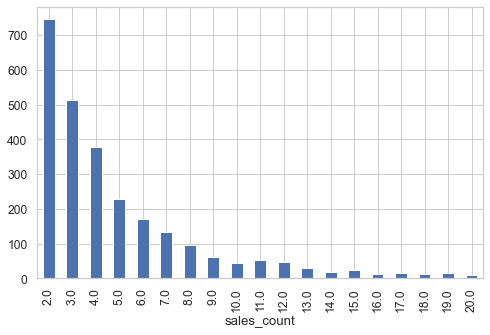

In [13]:
#plotting the repeated customers purchase count
summary_df.groupby(['sales_count']).count()['sales_avg'][:20].plot(kind ='bar');

> Most of the repeated customers purchases are less than 5 times  

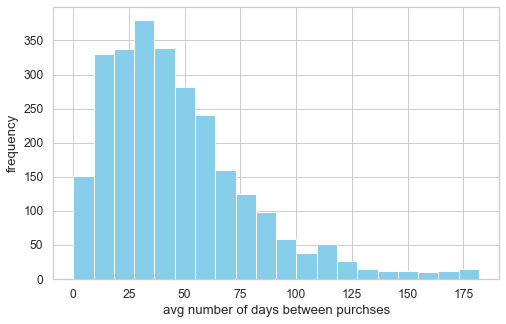

In [49]:
#the average number of days between purchases
ax = summary_df['invoicedate_avg_frequency'].hist(bins = 20 , color = 'skyblue')
ax.set_xlabel('avg number of days between purchses')
ax.set_ylabel('frequency');

> Frequently/ repeated customers made purchases on average every 20 - 50 days mostly

#### Data Preprocessing before Modeling

> We break down the data into chunks of **3 months** for each customer.(aggregate data for each customer for every 3 months)
- Group the Invoice Date column every 3 month 
- Sum up all the sales for every 3 month period
- take the average purchase amount and total number of purchases for each customer for 3 months period
- Cleanup the columns names

In [14]:
clv_freq = '3M'
data_df = orders_df.reset_index().groupby(['CustomerID', 
                                           pd.Grouper(key= 'InvoiceDate', freq = clv_freq)]).agg({
    'Sales':[sum, groupby_mean, groupby_count]
})
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()

In [15]:
#encoding date values into and so M_1, M_2, M_3  
#where the smaller number represents more recent dates(last 3 month till dec 2011 is encoded by M1)

date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i ,x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
)}


In [16]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x : date_month_map[str(x)[:10]])

In [17]:
data_df

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600000,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790000,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390000,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385000,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910000,1.0,M_2
...,...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0,M_3
9216,18283.0,2011-09-30,278.09,92.696667,3.0,M_2
9217,18283.0,2011-12-31,766.21,153.242000,5.0,M_1
9218,18287.0,2011-06-30,765.28,765.280000,1.0,M_3


<a id='model'></a>
## Regression Model

In [18]:
#preparing Features to predict M1 (last 3 months)
features_df = pd.pivot_table(
data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], 
columns='M',
index = 'CustomerID')

In [19]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [20]:
features_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.250000,NaN,312.362000,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,180.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,180.60,NaN
18281.0,NaN,80.820,NaN,NaN,NaN,1.0,NaN,NaN,NaN,80.82,NaN,NaN
18282.0,100.210000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,100.21,NaN,NaN,NaN


In [21]:
#filling NaN values with Zero
features_df = features_df.fillna(0)

In [22]:
features_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00
18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00
18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00


In [23]:
#defining the Target variable (M1), Customer's ID and their 3 months sum of purchases
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [24]:
#Changing the name of the response column to customer life time value (last 3 month) which we're going to predict
response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


In [25]:
sample_set_df = features_df.merge(response_df, left_index=True, right_on='CustomerID', how = 'left')
sample_set_df = sample_set_df.fillna(0)

In [26]:
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,18280.0,0.00
NaN,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,18281.0,0.00
NaN,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,18282.0,0.00
9217.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,18283.0,766.21


In [27]:
from sklearn.model_selection import train_test_split
target_var   = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features],
                                                   sample_set_df[target_var], 
                                                   test_size = 0.3)

In [28]:
#import and initiate a LinearRegression object
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [29]:
reg_fit.intercept_

65.36150319516378

In [30]:
coeff = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coeff.columns = ['feature', 'coeff']
coeff.sort_values(by='coeff', ascending = False)

,feature,coeff
4,sales_count_M_2,116.982317
11,sales_sum_M_5,0.769317
9,sales_sum_M_3,0.516665
0,sales_avg_M_2,0.287822
10,sales_sum_M_4,0.169063
8,sales_sum_M_2,0.168863
2,sales_avg_M_4,-0.163757
3,sales_avg_M_5,-0.210495
1,sales_avg_M_3,-0.541653
6,sales_count_M_4,-50.904896


>Sales_avg_M_2 is positively correlated with the next 3 month customer value, while sales_avg_M_ 3 and 4 are negatively correlated, the higher their purchses the lower the value for M1(last 3 months of purchases)

#### Evaluating Model Performance:

In [31]:
from sklearn.metrics import r2_score, median_absolute_error

In [38]:
train_preds = reg_fit.predict(x_train)
test_preds  = reg_fit.predict(x_test)

In [39]:
in_sample_r2 = r2_score(y_train, train_preds)
out_sample_r2= r2_score(y_test, test_preds)

In [40]:
print('insample R2 :' ,in_sample_r2)
print('out of sample r2: ', out_sample_r2)

insample R2 : 0.7629997578566554
out of sample r2:  0.34456124834511903


In [35]:
in_sample_MAE  = median_absolute_error(y_train, train_preds)
out_sample_MAE = median_absolute_error(y_test, test_preds)

In [36]:
print('insample MAE :' ,in_sample_MAE)
print('out of sample MAE: ', out_sample_MAE)

insample MAE : 219.1982524091917
out of sample MAE:  216.42828374823756


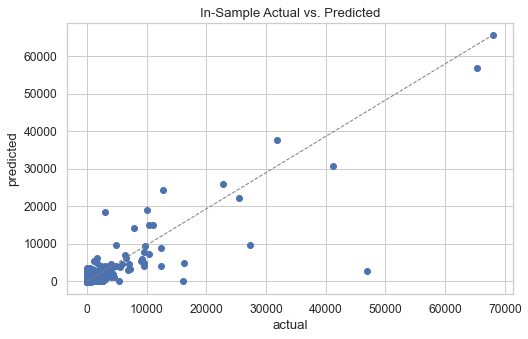

In [41]:
#scatter plot of predicted versus actual.
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')

plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
train_preds = forest_reg.predict(x_train)
test_preds  = forest_reg.predict(x_test)
in_sample_r2 = r2_score(y_train, train_preds)
out_sample_r2= r2_score(y_test, test_preds)

In [44]:
print('insample R2 :' ,in_sample_r2)
print('out of sample r2: ', out_sample_r2)

insample R2 : 0.9474599317174829
out of sample r2:  0.4663216430430771


In [48]:
feature_importances = forest_reg.feature_importances_
feature_importance_df =pd.DataFrame(list(zip(feature_importances, sample_set_df.columns)))
feature_importance_df.columns = ['Feature_importance', 'feature']
feature_importance_df = feature_importance_df.sort_values(by ='Feature_importance', ascending = False)

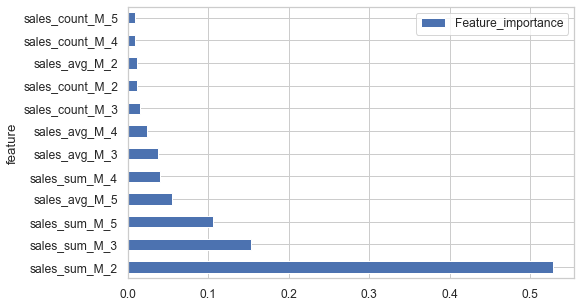

In [54]:
feature_importance_df.set_index('feature').plot(kind = 'barh');

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'n_estimators' : [100 , 150, 200 , 300], 'max_features': [2, 4, 6, 8, 10]}, 
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]
forest_reg2 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg2, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', return_train_score=True)

In [59]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [100, 150, 200, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [62]:
#predicting and measuring median absolute error
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)
final_mae = median_absolute_error(y_test, final_predictions)
final_mae

183.86600000000004

<a id='conclusions'></a>
## Conclusions
> EDA Findings:
- Most of the repeated customers purchases are less than 5 times  
- Frequently/ repeated customers made purchases on average every 20 - 50 days

>Regression Model Findings:
- Linear regression 

Sales_avg_M_2 is positively correlated with the next 3 month customer value, while sales_avg_M_ 3 and 4 are negatively correlated, the higher their purchses the lower the value for M1(last 3 months of purchases)

Measuring R2 score for the Linear Model insample, the score was over 0.70 which means the model did a good job for fitting data on the training dataset except for some outliers
- Random Forest regressor

 random forest did slightly better with grid search in the mean absolute error score